# Step - 3: Legacy of Slavery Certificate of Freedom Case Study - Data Visualization

In [85]:
# write python code to plot charts and maps
# install python libraries used for plots if they are not installed already
!pip install bokeh
!pip install cufflinks plotly
!pip install plotly_express
!pip install plotly-geo
!pip install chart_studio
!pip install networkx
!pip install wordcloud

In [86]:
# import important libraries used for visualization purposes
import pandas as pd
import networkx
import numpy as np
from plotly.offline import init_notebook_mode, iplot
# import chart_studio
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import cufflinks
import plotly
# word cloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# matplotlib library
import matplotlib.pyplot as plt

# import bokeh library which is a famous one for network analysis
from bokeh.io import output_notebook, show, save

# these are needed for Network Visualization below
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

# these are needed for Geo Map visualization below
import plotly.figure_factory as ff
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)    

In [87]:
#reimport the csv saved from the previous step 2
#code to import the csv saved from the previous step
df = pd.read_csv("Datasets/LoS_Clean_Output_Mod2.csv") 
df.head(10)

C:\Users\rgnanase\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (24,25) have mixed types.Specify dtype option on import or set low_memory=False.



,DataID,DataItem,County,Owner_FirstName,Owner_LastName,Witness,Date,Freed_FirstName,Freed_LastName,Alias,...,DatasetName,Notes,isWorking,isError,ChangeDate,CreateDate,DateFormatted,PriorStatusFormatted,Height_Inches,AgeFormatted
0,AR7-46,1,AA,Ann,Ailsworth,NaN,None,Keziah,Cromwell,NaN,...,FF,NaN,0,0,39:20.3,39:20.3,NaN,Unknown,63.00,20.0
1,AR7-46,2,AA,Ann,Ailsworth,Zachariah Duvall,1811-06-24,Resiah,Cromwell,NaN,...,FF,NaN,0,0,39:20.3,39:20.3,1811-06-24,Unknown,63.00,28.0
2,AR7-46,3,AA,Ann,Ailsworth,Jenifer Duvall,1811-06-24,Kesiah,Cromwell,NaN,...,FF,Freed by will of Mrs. Ann Ailsworth.,0,0,39:20.3,39:20.3,1811-06-24,Slave,63.00,28.0
3,AR7-46,4,AA,William,Alexander,NaN,1815-03-28,Handy,McCeomey,NaN,...,FF,"Freed by manumission, dated 27 March 1815. Rai...",0,0,39:20.3,39:20.3,1815-03-28,Unknown,67.75,43.0
4,AR7-46,5,AA,Thomas,Allen,NaN,1837-07-10,Nancy,Ennis,NaN,...,FF,Freed by petition to Anne Arundel County Court...,0,0,39:20.3,39:20.3,1837-07-10,Unknown,57.50,37.0
5,AR7-46,6,AA,Thomas,Allen,NaN,1837-08-03,Jim,Sharpe,NaN,...,FF,Freed by petition to Anne Arundel County Court...,0,0,39:20.3,39:20.3,1837-08-03,Unknown,61.50,41.0
6,AR7-46,7,AA,James,Alleson,NaN,1826-10-28,Belly,NaN,NaN,...,FF,"Freed by manumission, dated 28 Oct 1826. Raise...",0,0,39:20.3,39:20.3,1826-10-28,Unknown,61.50,26.0
7,AR7-46,8,AA,Mary,Alwell,NaN,1844-11-08,Howard,Davis,NaN,...,FF,"son of Nelly. Freed by manumission, dated 12 A...",0,0,39:20.3,39:20.3,1844-11-08,Unknown,66.50,22.0
8,AR7-46,9,AA,Mary,Armiger,NaN,1819-01-27,Abigail,NaN,NaN,...,FF,along with Richard G. Stetton. Freed by manumi...,0,0,39:20.3,39:20.3,1819-01-27,Unknown,61.00,40.0
9,AR7-46,10,AA,Mary,Atcock,"Jacob Franklin, Jr.",1812-12-30,Ned,NaN,NaN,...,FF,NaN,0,0,39:20.3,39:20.3,1812-12-30,Unknown,66.25,21.0


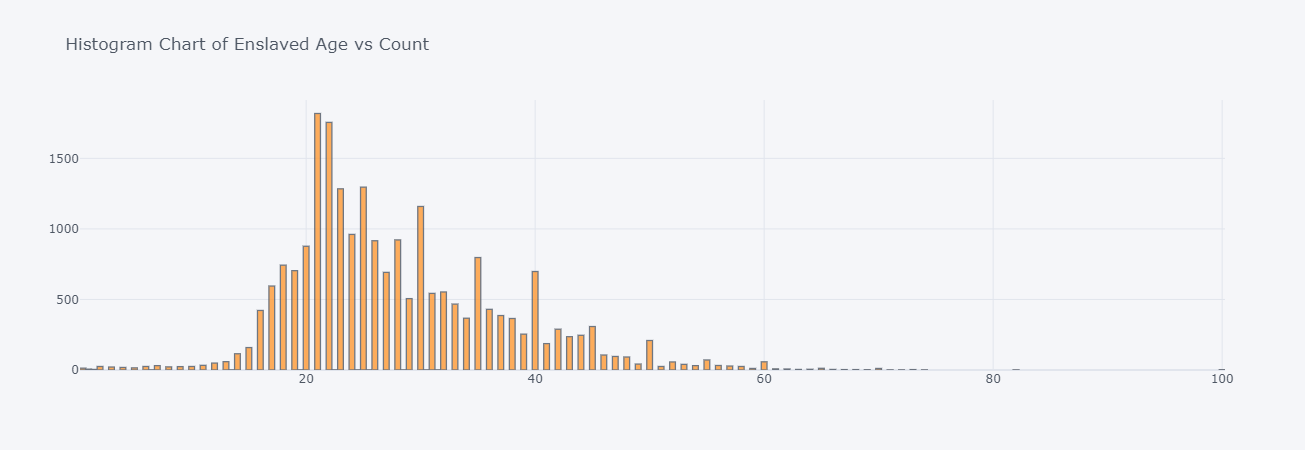

In [88]:
# Simple Histogram using iplot
df['AgeFormatted'].iplot(kind='hist', title='Histogram Chart of Enslaved Age vs Count')

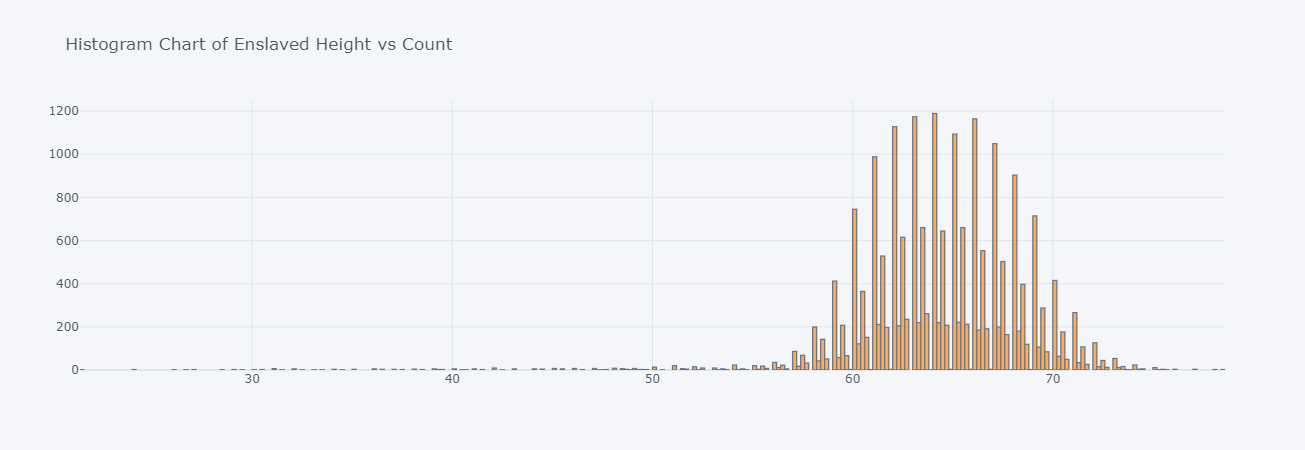

In [89]:
# Simple Histogram using iplot
df['Height_Inches'].iplot(kind='hist', title='Histogram Chart of Enslaved Height vs Count')

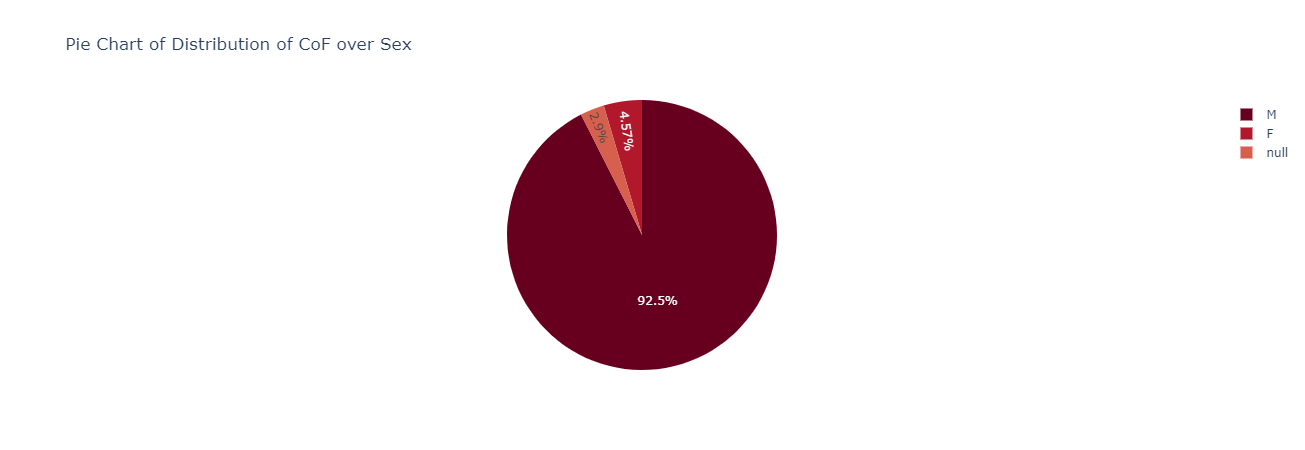

In [90]:
# Below chart is a pie chart for Sex
fig = px.pie(df, names='Sex',color_discrete_sequence=px.colors.sequential.RdBu,title="Pie Chart of Distribution of CoF over Sex")
fig.show()

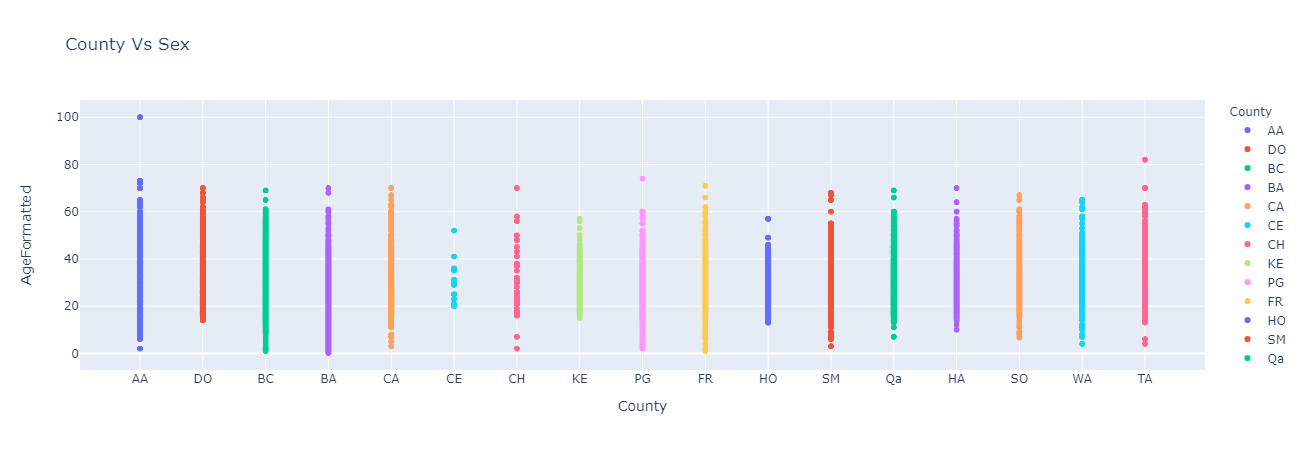

In [91]:
fig = px.scatter(df[df["County"].notna()&df["AgeFormatted"].notna()], x="County", y="AgeFormatted", color="County", hover_name="Freed_FirstName",
                 title="County Vs Sex")

fig.show()
# fig = px.pie(df, names='AgeFormatted',color_discrete_sequence=px.colors.sequential.RdBu)
# fig.show()

In [92]:
dfp=pd.DataFrame()
dfp['CoFDate'] = pd.to_datetime(df['DateFormatted'])
dfp['Sex']=df['Sex']
freq='Y'
dfp = dfp.groupby(['Sex', pd.Grouper(key='CoFDate', freq=freq)])['Sex'].agg(['count']).reset_index()
print(dfp)
# return a sorted DataFrame by date then count
dfp = dfp.sort_values(by=['CoFDate', 'count'])
# if you want to reset the index
dfp = dfp.reset_index(drop=True)

    Sex    CoFDate  count
0     F 1795-12-31      1
1     F 1803-12-31      1
2     F 1806-12-31      2
3     F 1808-12-31      1
4     F 1810-12-31      1
..   ..        ...    ...
103   M 1863-12-31    123
104   M 1864-12-31     26
105   M 1865-12-31      1
106   M 1918-12-31      1
107   M 1931-12-31      1

[108 rows x 3 columns]


# Interactive Line Chart Visualization of Sex of the Enslaved vs Year of the issue of CoF Document vs Counts

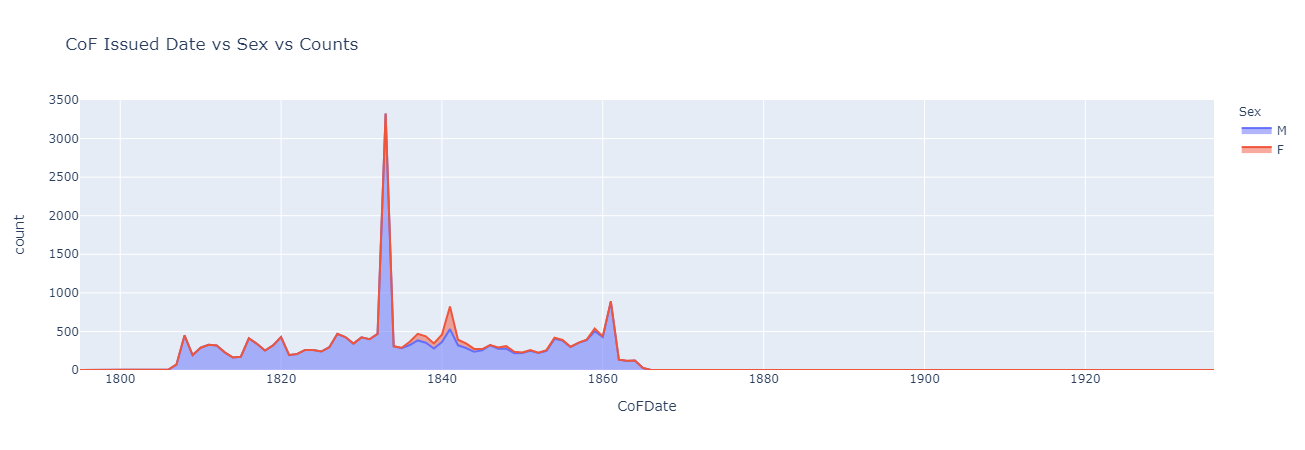

In [93]:
fig = go.Figure()
fig = px.area(dfp, x='CoFDate', y='count', color='Sex',title="CoF Issued Date vs Sex vs Counts")
fig.show()

![MD_Historical_Context](Pics/MD_Hist_Imp.PNG "MD_Historical_Context")

## Interactive Network Visualization and Analysis for the Enslaved and Owner (an example)

In [94]:
# this needs to be run for Bokeh library to be used
output_notebook()

Loading BokehJS ...

In [95]:
LoS_CoF_df = df.loc[(df["Owner_LastName"]=='Atwell')]
# print(LoS_CoF_df)
LoS_CoF = networkx.from_pandas_edgelist(LoS_CoF_df,'Owner_LastName','Freed_FirstName','DataItem')

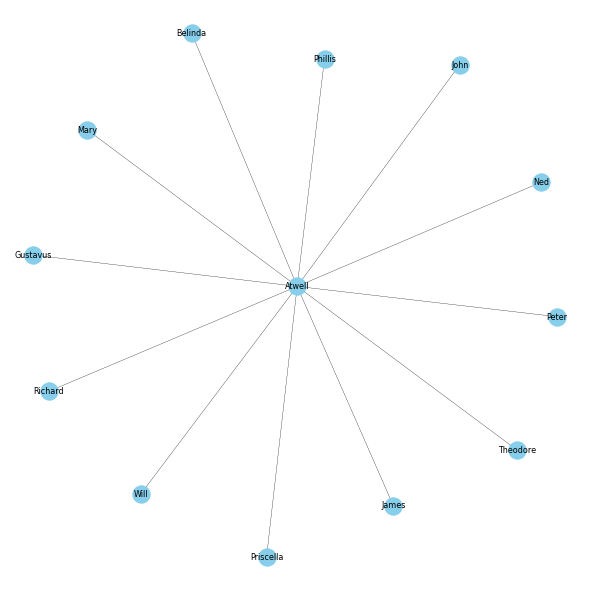

In [96]:
plt.figure(figsize=(8,8))
networkx.draw(LoS_CoF, with_labels=True, node_color='skyblue', width=.3, font_size=8)
#Choose a title!
title = 'Legacy Of Slavery Certificates of Freedom - Enslaved, Owner, Witness Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Freed_FirstName", "@index")]
# TOOLTIPS = [
#     ("index", "$index"),
#     ("(x,y)", "($x, $y)"),
#     ("desc", "$index"),
# ]
#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(LoS_CoF, networkx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

# Interactive Geo Map Visualization of Maryland Counties from the Dataset (still work to be done)

In [97]:
dfg = pd.DataFrame()
dfg= df
dfg.loc[(df["County"]=='AA'), "County_Code"] = "24003"
dfg.loc[(df["County"]=='AA'), "County_New"] ="Anne Arundel"
dfg.loc[(df["County"]=='AL'), "County_Code"] ="24001"
dfg.loc[(df["County"]=='AL'), "County_New"] ="Allegany"
dfg.loc[(df["County"]=='BA'), "County_Code"] ="24510"
dfg.loc[(df["County"]=='BA'), "County_New"] ="Baltimore County"
dfg.loc[(df["County"]=='BC'), "County_Code"] ="24005"
dfg.loc[(df["County"]=='BC'), "County_New"] ="Baltimore City"
dfg.loc[(df["County"]=='CA'), "County_Code"] ="24011"
dfg.loc[(df["County"]=='CA'), "County_New"] ="Caroline"
dfg.loc[(df["County"]=='CE'), "County_Code"] ="24015"
dfg.loc[(df["County"]=='CE'), "County_New"] ="Cecil"
dfg.loc[(df["County"]=='CH'), "County_Code"] ="24017"
dfg.loc[(df["County"]=='CH'), "County_New"] ="Charles"
dfg.loc[(df["County"]=='CR'), "County_Code"] ="24013"
dfg.loc[(df["County"]=='CR'), "County_New"] ="Carroll"
dfg.loc[(df["County"]=='CV'), "County_Code"] ="24009"
dfg.loc[(df["County"]=='CV'), "County_New"] ="Calvert"
dfg.loc[(df["County"]=='DO'), "County_Code"] ="24019"
dfg.loc[(df["County"]=='DO'), "County_New"] ="Dorchester"
dfg.loc[(df["County"]=='FR'), "County_Code"] ="24021"
dfg.loc[(df["County"]=='FR'), "County_New"] ="Frederick"
dfg.loc[(df["County"]=='GA'), "County_Code"] ="24023"
dfg.loc[(df["County"]=='GA'), "County_New"] ="Garrett"
dfg.loc[(df["County"]=='HA'), "County_Code"] ="24025"
dfg.loc[(df["County"]=='HA'), "County_New"] ="Harford"
dfg.loc[(df["County"]=='HO'), "County_Code"] ="24027"
dfg.loc[(df["County"]=='HO'), "County_New"] ="Howard"
dfg.loc[(df["County"]=='KE'), "County_Code"] ="24029"
dfg.loc[(df["County"]=='KE'), "County_New"] ="Kent"
dfg.loc[(df["County"]=='MO'), "County_Code"] ="24031"
dfg.loc[(df["County"]=='MO'), "County_New"] ="Montgomery"
dfg.loc[(df["County"]=='PG'), "County_Code"] ="24033"
dfg.loc[(df["County"]=='PG'), "County_New"] ="Prince George's"
dfg.loc[(df["County"]=='QA'), "County_Code"] ="24035"
dfg.loc[(df["County"]=='QA'), "County_New"] ="Queen Anne's"
dfg.loc[(df["County"]=='SM'), "County_Code"] ="24037"
dfg.loc[(df["County"]=='SM'), "County_New"] ="St. Mary's"
dfg.loc[(df["County"]=='SO'), "County_Code"] ="24039"
dfg.loc[(df["County"]=='SO'), "County_New"] ="Somerset"
dfg.loc[(df["County"]=='TA'), "County_Code"] ="24041"
dfg.loc[(df["County"]=='TA'), "County_New"] ="Talbot"
dfg.loc[(df["County"]=='WA'), "County_Code"] ="24043"
dfg.loc[(df["County"]=='WA'), "County_New"] ="Washington"
dfg.loc[(df["County"]=='WI'), "County_Code"] ="24045"
dfg.loc[(df["County"]=='WI'), "County_New"] ="Wicomico"
dfg.loc[(df["County"]=='WO'), "County_Code"] ="24047"
dfg.loc[(df["County"]=='WO'), "County_New"] ="Worcester"

In [50]:
values=pd.DataFrame()
values=dfg.groupby('County_Code').agg('count')
# print(values)

fig = px.choropleth(dfg[dfg["County_Code"].notna()], geojson=counties, locations='County_Code', color='County_New',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'County_New':'County Name'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

# Word Cloud Visualization of an important feature (Notes) which are comments/remarks entered by transcribers.

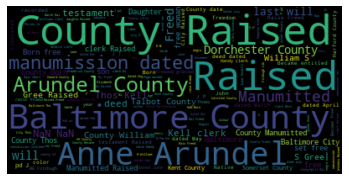

In [98]:
# Start with the Notes feature:
text = df['Notes']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text.to_string())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

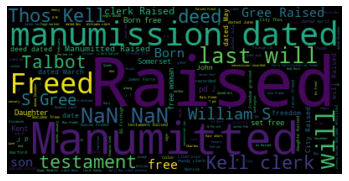

In [99]:
# Start with the Notes feature:
text = df['Notes']

stopwords = set(STOPWORDS)
stopwords.update(["Anne", "Arundel", "Baltimore", "Arundel County", "Dorchester","County"])
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text.to_string())

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# End of Modules.
[Click here to go to index page](index.ipynb)